In [11]:
#I exported the Boston dataset from R using write.csv(Boston, 'C:/Users/mcichra/Documents/ISLR work/Boston.csv', row.names=FALSE)
import pandas as pd
pd.set_option('display.float_format', '{:,.2f}'.format)
converters = {'a': int, 'b': int, 'c': int}
Boston = pd.read_csv('C:/Users/mcichra/Documents/ISLR work/Boston.csv', converters=converters)
Boston.shape

(506, 14)

In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

from patsy import dmatrices, dmatrix

%matplotlib inline
plt.style.use('seaborn-white')

C:\Users\mcichra\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [12]:
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [13]:
Boston.describe(include = 'all')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [14]:
Boston01 = Boston
crim01 = np.repeat(0, Boston.shape[0]) 
crim01[Boston01.crim > np.median(Boston01.crim)]=1
Boston01['crim01']=crim01
Boston01.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv', 'crim01'],
      dtype='object')

In [15]:
Boston01.describe(include = 'all')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crim01
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53,0.50
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20,0.50
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00,0.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02,0.00
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20,0.50
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00,1.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00,1.00


C:\Users\mcichra\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0,0.5,'median home value')

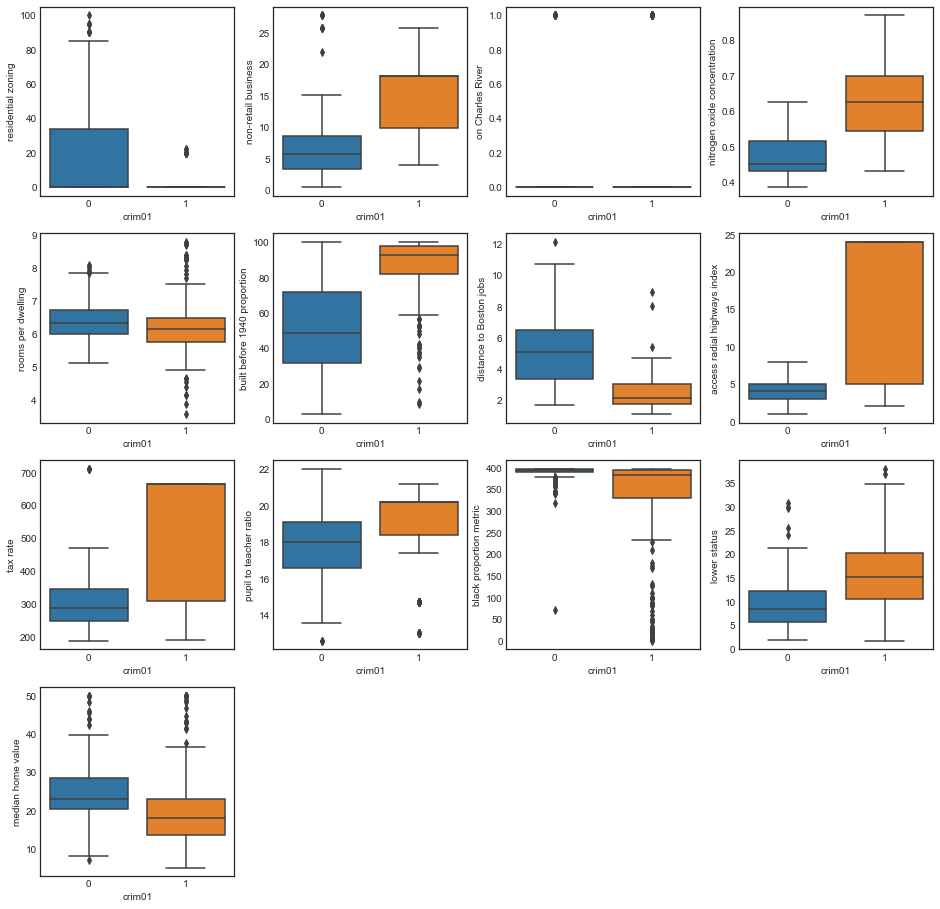

In [25]:
fig = plt.figure(figsize=(16,16)) #width and height
ax1 = plt.subplot2grid((4, 4), (0, 0))
ax2 = plt.subplot2grid((4, 4), (0, 1))
ax3 = plt.subplot2grid((4, 4), (0, 2))
ax4 = plt.subplot2grid((4, 4), (0, 3))
ax5 = plt.subplot2grid((4, 4), (1, 0))
ax6 = plt.subplot2grid((4, 4), (1, 1))
ax7 = plt.subplot2grid((4, 4), (1, 2))
ax8 = plt.subplot2grid((4, 4), (1, 3))
ax9 = plt.subplot2grid((4, 4), (2, 0))
ax10 = plt.subplot2grid((4, 4), (2, 1))
ax11 = plt.subplot2grid((4, 4), (2, 2))
ax12 = plt.subplot2grid((4, 4), (2, 3))
ax13 = plt.subplot2grid((4, 4), (3, 0))
sns.boxplot(x="crim01", y="zn", data=Boston01, ax=ax1)
ax1.set_ylabel("residential zoning")
sns.boxplot(x="crim01", y="indus", data=Boston01, ax=ax2)
ax2.set_ylabel("non-retail business")
sns.boxplot(x="crim01", y="chas", data=Boston01, ax=ax3)
ax3.set_ylabel("on Charles River")
sns.boxplot(x="crim01", y="nox", data=Boston01, ax=ax4)
ax4.set_ylabel("nitrogen oxide concentration")
sns.boxplot(x="crim01", y="rm", data=Boston01, ax=ax5)
ax5.set_ylabel("rooms per dwelling")
sns.boxplot(x="crim01", y="age", data=Boston01, ax=ax6)
ax6.set_ylabel("built before 1940 proportion")
sns.boxplot(x="crim01", y="dis", data=Boston01, ax=ax7)
ax7.set_ylabel("distance to Boston jobs")
sns.boxplot(x="crim01", y="rad", data=Boston01, ax=ax8)
ax8.set_ylabel("access radial highways index")
sns.boxplot(x="crim01", y="tax", data=Boston01, ax=ax9)
ax9.set_ylabel("tax rate")
sns.boxplot(x="crim01", y="ptratio", data=Boston01, ax=ax10)
ax10.set_ylabel("pupil to teacher ratio")
sns.boxplot(x="crim01", y="black", data=Boston01, ax=ax11)
ax11.set_ylabel("black proportion metric")
sns.boxplot(x="crim01", y="lstat", data=Boston01, ax=ax12)
ax12.set_ylabel("lower status")
sns.boxplot(x="crim01", y="medv", data=Boston01, ax=ax13)
ax13.set_ylabel("median home value")

From this it looks like the following variables might be promising candidates as predictors: non-retail business, nitrogen oxide condentration, portion built before 1940, distance to Boston jobs, and access to highways.

In [29]:
Boston01.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crim01
crim,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39,0.41
zn,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36,-0.44
indus,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48,0.60
chas,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18,0.07
nox,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43,0.72
rm,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70,-0.16
age,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38,0.61
dis,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25,-0.62
rad,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38,0.62
tax,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47,0.61


The variables with the strongest correlations with our crime rate flag appear to be: indus, nox, age, dis, and rad.

In [31]:
#randomly assign 30% to test set
np.random.seed(1)
split = np.random.uniform(0,1,Boston01.shape[0])
Boston01Test=Boston01[split>=0.7]
Boston01Train=Boston01[split<0.7]
Boston01Test.shape

(157, 15)

In [34]:
#glm with everything. Using statsmodels formulas
glmfit = smf.logit(formula='crim01 ~ indus + chas + nox + rm + age + dis +rad + tax + ptratio + black + lstat + medv', data = Boston01Train).fit()
print(glmfit.summary())

Optimization terminated successfully.
         Current function value: 0.194803
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                 crim01   No. Observations:                  349
Model:                          Logit   Df Residuals:                      336
Method:                           MLE   Df Model:                           12
Date:                Wed, 09 May 2018   Pseudo R-squ.:                  0.7189
Time:                        16:04:50   Log-Likelihood:                -67.986
converged:                       True   LL-Null:                       -241.84
                                        LLR p-value:                 4.279e-67
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5715     10.672     -1.647      0.100     -38.488       3.345
indus         -0.1384      0

This is a bit different than what I saw based on my training data when I used R to do the analysis. Probably because of the observations which randomly got assigned to my training set. I'll proceed according to what I see here and use indus nox, dis, rad, tax, ptratio, and black. I'll also use age since it looked promising up above.

In [36]:
glmfit2 = smf.logit(formula='crim01 ~ indus + nox + age + dis +rad + tax + ptratio + black', data = Boston01Train).fit()
print(glmfit2.summary())

Optimization terminated successfully.
         Current function value: 0.202737
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                 crim01   No. Observations:                  349
Model:                          Logit   Df Residuals:                      340
Method:                           MLE   Df Model:                            8
Date:                Wed, 09 May 2018   Pseudo R-squ.:                  0.7074
Time:                        16:10:25   Log-Likelihood:                -70.755
converged:                       True   LL-Null:                       -241.84
                                        LLR p-value:                 4.254e-69
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.9400      8.708     -1.371      0.170     -29.008       5.128
indus         -0.1422      0

Might end up taking out age and dis but let me see what happens on my test set first.

In [39]:
glmprobs = glmfit2.predict(Boston01Test)
glmpred = np.repeat(0,Boston01Test.shape[0])
glmpred[glmprobs>.5]=1
df = pd.DataFrame({'Actual Crime Index': Boston01Test.crim01, 'Predicted Crime Index': glmpred})
df.groupby(['Predicted Crime Index', 'Actual Crime Index']).size().unstack('Actual Crime Index')

Actual Crime Index,0,1
Predicted Crime Index,,
0,65,8
1,10,74


In [40]:
np.mean(glmpred!=Boston01Test.crim01)

0.11464968152866242

Let's try without age and dis.

In [42]:
glmfit3 = smf.logit(formula='crim01 ~ indus + nox +rad + tax + ptratio + black', data = Boston01Train).fit()
print(glmfit3.summary())

Optimization terminated successfully.
         Current function value: 0.203796
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                 crim01   No. Observations:                  349
Model:                          Logit   Df Residuals:                      342
Method:                           MLE   Df Model:                            6
Date:                Wed, 09 May 2018   Pseudo R-squ.:                  0.7059
Time:                        16:14:35   Log-Likelihood:                -71.125
converged:                       True   LL-Null:                       -241.84
                                        LLR p-value:                 1.068e-70
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.2172      8.092     -1.263      0.207     -26.077       5.643
indus         -0.1384      0

In [43]:
glmprobs3 = glmfit3.predict(Boston01Test)
glmpred3 = np.repeat(0,Boston01Test.shape[0])
glmpred3[glmprobs3>.5]=1
df3 = pd.DataFrame({'Actual Crime Index': Boston01Test.crim01, 'Predicted Crime Index': glmpred3})
df3.groupby(['Predicted Crime Index', 'Actual Crime Index']).size().unstack('Actual Crime Index')

Actual Crime Index,0,1
Predicted Crime Index,,
0,65,10
1,10,72


In [45]:
np.mean(glmpred3!=Boston01Test.crim01)

0.12738853503184713

Hmm this is worse! So those insignificant variables in the Training set ended up being important for producing a better result on the Test set! In real life I still might choose not to include them, since I want to avoid overfitting to the Test set. I'll exclude them here too.

In [46]:
from patsy import dmatrices, dmatrix
X_train= dmatrix("indus + nox +rad + tax + ptratio + black", Boston01Train)
X_test= dmatrix("indus + nox +rad + tax + ptratio + black", Boston01Test)
y=Boston01Train.crim01.as_matrix()
lda = LinearDiscriminantAnalysis(solver='svd')
est = lda.fit(X_train, y)
ldaprobs = est.predict(X_test)
ldapred = np.repeat(0, Boston01Test.shape[0])
ldapred[ldaprobs>.5]=1
df = pd.DataFrame({'Actual Crime Index': Boston01Test.crim01, 'Predicted Crime Index': ldapred})
df.groupby(['Predicted Crime Index', 'Actual Crime Index']).size().unstack('Actual Crime Index')

C:\Users\mcichra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Actual Crime Index,0,1
Predicted Crime Index,,
0,73,23
1,2,59


In [47]:
np.mean(ldapred!=Boston01Test.crim01)

0.15923566878980891

In [49]:
X_train2= dmatrix("indus + nox +rad + tax + ptratio + black", Boston01Train)
X_test2= dmatrix("indus + nox +rad + tax + ptratio + black", Boston01Test)
y2=Boston01Train.crim01.as_matrix()
qda = QuadraticDiscriminantAnalysis()
est2 = qda.fit(X_train2, y2)
qdaprobs = est2.predict(X_test2)
qdapred = np.repeat(0, Boston01Test.shape[0])
qdapred[qdaprobs>.5]=1
df2 = pd.DataFrame({'Actual Crime Index': Boston01Test.crim01, 'Predicted Crime Index': qdapred})
df2.groupby(['Predicted Crime Index', 'Actual Crime Index']).size().unstack('Actual Crime Index')

C:\Users\mcichra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\mcichra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:706: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\mcichra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:706: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\mcichra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:709: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


Actual Crime Index,0,1
Predicted Crime Index,,
0,75,82


This is similar to the results I've been getting with qda in sklearn in these exercises. I wonder if I'm missing some element of setup here. 